In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_train=pd.read_csv("C:\\Users\\srile\\Downloads\\House_Price_train(House_Price_train).csv")

In [3]:
house_train_num=house_train.select_dtypes(include=[np.number])

In [4]:
house_train_num_cols = house_train_num.columns

In [7]:
house_train_cat = house_train.select_dtypes(include=['object'])  

# Now, get column names
house_train_cat_cols = house_train_cat.columns
print(house_train_cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
house_train_num_corr=house_train_num.corr()

In [9]:
house_train_num_cols0 = []
house_train_num_cols0.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]>0.3) ].index.values)
house_train_num_cols0.extend(house_train_num_corr[(house_train_num_corr["SalePrice"]<-0.3) ].index.values)

In [10]:
h_train_num_col_filtered=house_train_num[house_train_num_cols0]

In [11]:
(h_train_num_col_filtered.isnull().sum().sort_values(ascending=False))


LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
FullBath          0
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
GrLivArea         0
OverallQual       0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
SalePrice         0
dtype: int64

In [12]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"]:
    h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)

C:\Users\srile\AppData\Local\Temp\ipykernel_20928\1583005769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  h_train_num_col_filtered[col].fillna(h_train_num_col_filtered[col].median(),inplace=True)
C:\Users\srile\AppData\Local\Temp\ipykernel_20928\1583005769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_train_num_col_filtered[col]

In [13]:
(house_train_cat.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [14]:

for col in ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"]:
    house_train_cat[col].fillna('No Value',inplace=True)

C:\Users\srile\AppData\Local\Temp\ipykernel_20928\1310196780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_train_cat[col].fillna('No Value',inplace=True)


In [15]:
for col in ["GarageCond","GarageQual","GarageFinish","GarageType","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtQual","BsmtCond","MasVnrType","Electrical"]:
    house_train_cat[col].fillna(house_train_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\srile\AppData\Local\Temp\ipykernel_20928\648206534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_train_cat[col].fillna(house_train_cat[col].value_counts().idxmax(),inplace=True)
C:\Users\srile\AppData\Local\Temp\ipykernel_20928\648206534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [16]:
df_0 = pd.concat([house_train_cat,h_train_num_col_filtered],axis=1)

In [17]:
df_0_num = df_0.select_dtypes(include=[np.number])

In [18]:
df_0_cat =df_0.select_dtypes(include=['object'])

In [19]:
num_cols = df_0_num.columns
cat_cols = df_0_cat.columns

In [20]:
y = df_0["SalePrice"]
X = df_0.drop(["SalePrice"],axis=1)

In [21]:
X1=pd.get_dummies(X)

In [22]:
len(X.columns)

61

In [23]:
len(X1.columns)

274

In [24]:
x1_max=sorted(list(X1.max()))[-1]

In [25]:
y_max=sorted(list(y))[-1]

In [26]:
x1_max,y_max

(6110, 755000)

In [27]:
X1_scale = X1/x1_max

In [28]:
y_scale = y/y_max

In [31]:
!pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
%matplotlib inline
print("Using PyTorch Version %s" %torch.__version__)

Using PyTorch Version 2.6.0+cpu


In [33]:
np.random.seed(0)
torch.manual_seed(0)

X_train, X_test, Y_train, Y_test = train_test_split(X1_scale, y_scale, test_size=0.10, random_state=73)

In [34]:
# Define network dimensions
n_input_dim = X_train.shape[1]
# Layer size
n_hidden = n_input_dim * 2 # Number of hidden nodes
n_hidden1 = int(n_input_dim / 2)
n_hidden2 = int(n_input_dim / 4)
n_output = 1 # Number of output nodes = for binary classifier

# Build your network
net = nn.Sequential(
    nn.Linear(n_input_dim, n_hidden),
    nn.ELU(),
    nn.Linear(n_hidden, n_hidden1),
    nn.Tanh(),
    nn.Linear(n_hidden1, n_hidden2),
    nn.ELU(),
    nn.Linear(n_hidden2, n_output),
     nn.Sigmoid())
    
print(net)

Sequential(
  (0): Linear(in_features=274, out_features=548, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=548, out_features=137, bias=True)
  (3): Tanh()
  (4): Linear(in_features=137, out_features=68, bias=True)
  (5): ELU(alpha=1.0)
  (6): Linear(in_features=68, out_features=1, bias=True)
  (7): Sigmoid()
)


In [36]:
loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

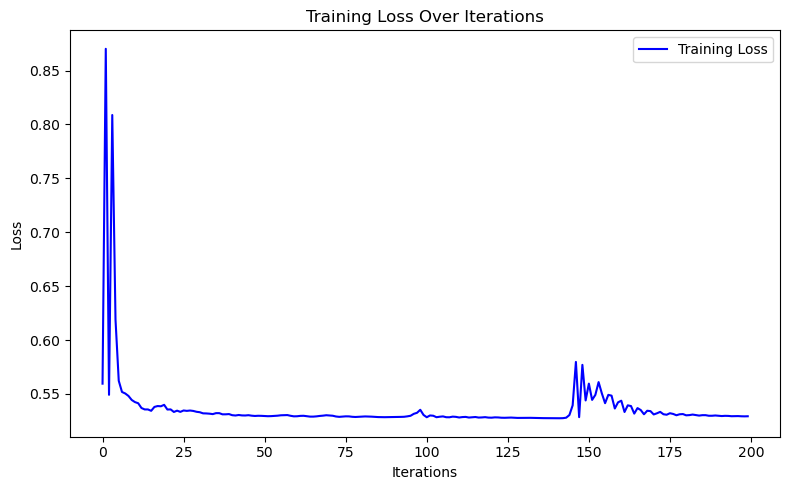

In [46]:
import torch
import matplotlib.pyplot as plt

train_loss = []
iters = 200  # Number of training iterations

# Convert dataset to tensors once before the loop
X_train_t = torch.from_numpy(X_train.values).float()
Y_train_t = torch.from_numpy(Y_train.values).float().unsqueeze(1)  # Ensure shape matches y_hat

for i in range(iters):
    optimizer.zero_grad()  # Reset gradients

    # Forward pass
    y_hat = net(X_train_t)  # Predict outputs

    # Compute loss
    loss = loss_func(y_hat, Y_train_t)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Store loss
    train_loss.append(loss.item())

# Plot training loss
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(train_loss, label="Training Loss", color="blue")
ax.set_ylabel("Loss")
ax.set_xlabel("Iterations")
ax.set_title("Training Loss Over Iterations")
ax.legend()

plt.tight_layout()
plt.show()


In [47]:
X_test_t = torch.from_numpy(X_test.values)
y_hat_test = net(X_test_t.float())

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(Y_test,y_hat_test.detach().numpy())

0.7244720469386279